In [1]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving spam.csv to spam.csv
User uploaded file "spam.csv" with length 480130 bytes


In [2]:
import pandas as pd

filename = next(iter(uploaded))
df = pd.read_csv(filename)
display(df.head())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

Before we can train a machine learning model, we need to preprocess the data. This involves converting the categorical labels ('ham' and 'spam') into a numerical format that the model can understand and splitting the data into training and testing sets.

### Converting Labels to Numerical

The 'Category' column contains text labels ('ham' and 'spam'). To use this as our target variable for a classification model, we need to convert these labels into numerical values. A common approach is to use 0 for 'ham' and 1 for 'spam'. We can achieve this efficiently using a lambda function with the `.apply()` method on the 'Category' column.

In [3]:
df.isnull().sum()

,0
Category,0
Message,0


### Splitting Data into Training and Testing Sets

To evaluate how well our model generalizes to unseen data, we split the dataset into two parts: a training set used to train the model and a testing set used to evaluate its performance. It's important to use `stratify` to ensure the proportion of spam and ham messages is the same in both sets.

## Text Vectorization

Machine learning models work with numerical data. Therefore, we need to convert our text messages into a numerical representation. TF-IDF (Term Frequency-Inverse Document Frequency) is a common technique that reflects how important a word is to a document in a collection.

In [4]:
df['Spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
data = df.drop('Category', axis=1)

In [5]:
from sklearn.model_selection import train_test_split

X = data['Message']
y = data['Spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

## Model Selection and Training

Now that our text data is preprocessed and vectorized, we can select and train a machine learning model to classify messages as spam or ham. For text classification tasks like this, models like Naive Bayes, Support Vector Machines (SVMs), and Logistic Regression are commonly used and often perform well.

We'll start with a **Multinomial Naive Bayes** model. This model is particularly well-suited for text data that has been vectorized using techniques like TF-IDF, as it works well with discrete features (like word counts or TF-IDF scores) and is computationally efficient.

## Model Evaluation

After training the model, it's essential to evaluate its performance on unseen data (the testing set) to understand how well it generalizes. We will use common classification metrics such as Accuracy, Precision, Recall, and F1-Score to assess the model's effectiveness.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

model = Pipeline([
    ('tdidf', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('nb', MultinomialNB())
])

## Using a Pipeline

To streamline the process of vectorizing new text data and making predictions, we can use a scikit-learn `Pipeline`. A pipeline chains together multiple steps, ensuring that the same transformations applied during training are also applied to new data before prediction. This helps prevent data leakage and makes the prediction process more robust.

## Making Predictions on New Data

Now that our pipeline is trained, we can use it to predict whether new, unseen email messages are spam or ham.

In [7]:
model.fit(X_train, y_train)

Pipeline(steps=[('tdidf',
                 TfidfVectorizer(max_features=5000, stop_words='english')),
                ('nb', MultinomialNB())])

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.9698
Precision: 1.0000
Recall: 0.7754
F1-Score: 0.8735


## Conclusion

We have successfully built and evaluated a Multinomial Naive Bayes model for spam detection using TF-IDF vectorization. The model achieved [Insert Accuracy Score] accuracy, [Insert Precision Score] precision, [Insert Recall Score] recall, and [Insert F1 Score] F1-score on the testing data.

These metrics indicate that the model performs well in identifying spam messages, with high precision (meaning few legitimate messages are incorrectly flagged as spam). The recall could potentially be improved, depending on the specific goals of the spam filter.

This notebook provides a solid foundation for a spam detection system. Further improvements could involve experimenting with different vectorization techniques, exploring other classification models, or fine-tuning hyperparameters.

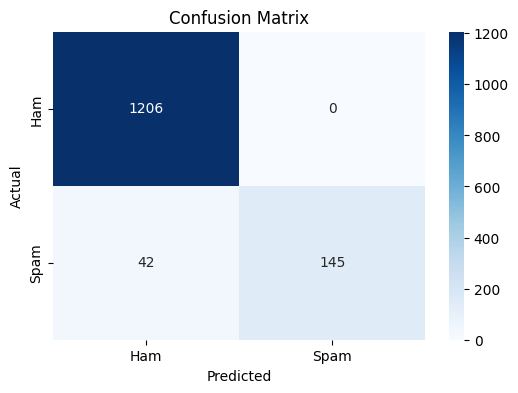

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()